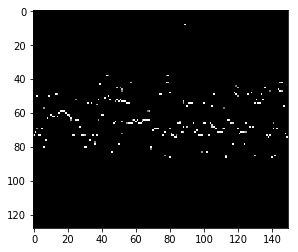

In [2]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

#spectro_file = os.path.join ('..', 'fft', 'test', 'c-major-scale-on-treble-clef.png')
#spectro_file = os.path.join ('..', '..', 'src_spectro', '8-0', 'TRIZVHE128EF351C4E.png')
#spectro_file = os.path.join ('..', '..', 'src_spectro', '7-0', 'TRUIIZI12903D00069.png')
spectro_file = os.path.join ('..', '..', 'src_spectro', '7-1', 'TRNIWUC128F4284F76.png')

img = Image.open (spectro_file).convert (mode='L')

plt.imshow (img)
plt.show ()

In [3]:
img.size

(150, 128)

In [4]:
img_arr = np.array (img)
img_arr.shape

(128, 150)

In [24]:
k = img_arr.shape[0]-np.argmax (img_arr, axis=0)
print (k, k.shape)

[ 55  57  78  55  55  59  48  52  65  78  67  66  66  79  66  68  69  69
  69  68  67  66  65  55  55  64  64  60  55  55  48  48  74  52  74  55
  50  55  76  85  67  67  77  90  78  76  45  62  63  76  75  76  75  75
  75  74  74  62  62  64  63  64  62  62  63  64  64  64  64  48  58  59
  59  59  79  79  55  57  86  90  80  55  55  54  54  62  62  57  60 120
  72  74  74  74  62  57  58  55  55  55  74  62  45  55  62  72  79  59
  57  57  57  57  59  42  64  64  62  50  80  79  59  56  57  57  50  62
  79  60  80  60  74  76  74  74  79  76  83  55  54  55  42  59  43  59
  82  81  86  72  56  54] (150,)


In [22]:
# run through all time chunks, get the corresponding pitch and add it to a list if not already in list

list_of_pitches_midi = np.empty (1).astype (int)
max_pitch_midi = img_arr.shape[0]
for i in range (img_arr.shape[1]):
    
    # check first if we have absolute silence in this time chunk = all values are zero
    if (img_arr[:,i].sum () == 0):
        continue
    
    pitch_midi = max_pitch_midi - img_arr[:,i].argmax ()
    if pitch_midi not in list_of_pitches_midi:
        list_of_pitches_midi = np.append (list_of_pitches_midi, pitch_midi)

list_of_pitches_midi = list_of_pitches_midi[1:]
print (list_of_pitches_midi)

[ 55  57  78  59  48  52  65  67  66  79  68  69  64  60  74  50  76  85
  77  90  45  62  63  75  58  86  80  54 120  72  42  56  83  43  82  81]


In [52]:
# run through all time chunks, get the corresponding pitch and add it to a list if not already in list

#list_of_pitches_midi = np.empty (1).astype (int)
max_pitch_midi = img_arr.shape[0]
#for i in range (img_arr.shape[1]):
    
    # check first if we have absolute silence in this time chunk = all values are zero
    #if (img_arr[:,i].sum () == 0):
    #    continue
    
list_of_pitches_midi_up = np.argmax (img_arr[::1,:] > 0, axis=0)
list_of_pitches_midi_dwn = np.argmax (img_arr[::-1,:] > 0, axis=0)
    #if pitch_midi not in list_of_pitches_midi:
    #    list_of_pitches_midi = np.append (list_of_pitches_midi, pitch_midi)

#list_of_pitches_midi = list_of_pitches_midi[1:]
print (list_of_pitches_midi_up, list_of_pitches_midi_up.size)
print (list_of_pitches_midi_dwn, list_of_pitches_midi_dwn.size)

[73 71 50 73 73 69 57 76 63 50 61 62 62 49 49 60 59 59 59 60 61 61 63 73
 73 52 64 68 73 73 73 80 54 76 54 73 77 55 52 43 61 61 51 38 38 52 83 66
 53 45 53 45 46 53 53 54 54 42 64 64 65 64 66 66 64 64 64 59 59 80 70 69
 69 69 49 49 73 71 38 38 48 72 73 74 73 66 65 71 53  8 56 54 54 54 66 71
 70 73 73 73 54 66 83 73 66 56 49 69 71 71 71 69 57 85 64 64 66 66 48 44
 45 72 71 71 71 66 49 68 48 68 54 52 54 54 49 52 45 73 74 47 86 66 85 69
 46 42 42 56 72 74] 150
[ 54  56  58  54  54  58  47  51  64  77  66  65  65  78  65  67  68  68
  68  67  66  65  63  54  54  63  63  59  54  54  47  47  73  51  73  54
  49  54  63  84  66  66  76  89  77  75  44  61  62  75  49  75  55  74
  74  61  61  61  61  63  62  63  61  61  62  63  63  63  63  46  57  58
  58  58  78  78  54  42  85  85  41  54  54  53  53  61  61  56  56 119
  59  73  73  73  61  56  57  54  54  44  61  61  44  54  61  59  59  58
  56  56  56  56  58  41  63  63  61  49  79  78  58  55  56  56  49  56
  78  59  79  59  42  75  7

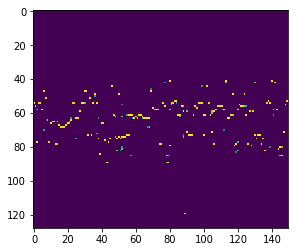

In [88]:
#plt.imshow (img_arr[::1,:])
plt.imshow (img_arr[::-1,:])

In [16]:
# function: get key of array pixel value
import math

def get_music_key (arr_val):
    tone = arr_val % 12
    octave = math.floor (arr_val / 12) - 1
    
    return tone, octave

In [17]:
dict_music_keys = {'C':0, 'C#':1, 'D':2, 'D#':3, 'E':4, 'F':5, 'F#':6, 'G':7, 'G#':8, 'A':9, 'A#':10, 'B':11}

In [18]:
for arr_val in list_of_pitches_midi:
    for dict_key, dict_value in dict_music_keys.items ():
        tone, octave = get_music_key (arr_val)
        if (tone == dict_value):
            print ('{}{}'.format (dict_key, octave), end=', ', flush=True)
print ()

G3, A3, F#5, B3, B4, E3, F4, G4, F#4, G5, G#4, A4, E5, E4, C4, C3, D5, D#3, C#5, C#6, F5, F#6, A2, D4, D#5, B5, A#5, D6, D#4, A#3, G#5, G#3, F#3, C9, C5, G2, C6, A5, F#2, 


## Octave Transposition
---
"In music transposition refers to the process, or operation, of moving a collection of notes (pitches or pitch classes) up or down in pitch by a constant interval." (<a href='https://en.wikipedia.org/wiki/Transposition_(music)'>Wikipedia - Transposition (music)</a>)

_

*Octave Equivalency*

"[...] notes an octave apart are given the same note name in the Western system of music notation — the name of a note an octave above A is also A. This is called octave equivalency, the assumption that pitches one or more octaves apart are musically equivalent in many ways [...]" (<a href='https://en.wikipedia.org/wiki/Octave#Theory'>Wikipedia - Octave, Theory</a>)

_

*Transpositional Equivalence*

"Using integer notation and modulo 12, to transpose a pitch x by n semitones (pitch class transposition by a pitch class interval):" (<a href='https://en.wikipedia.org/wiki/Transposition_(music)#Transpositional_equivalence'>Wikipedia - Transpositional Equivalence</a>)

$T_n(x) = x + n (mod 12)$

_

"Transposing a melody up or down by one octave will not change the key." (<a href='http://brebru.com/musicroom/theory/lesson18/octavetrans.html'>brebru - octave transposition</a>)

In [176]:
# check if min/max value out of 12-TET bounds after transposition
semitones_to_transpose = 12

def transpose_spectrogram (img_arr):
    min_oob = False
    max_oob = False
    min_oob_2 = False
    max_oob_2 = False
    if (np.argmax (img_arr[::1,:]>0, axis=0).min ()-semitones_to_transpose < 0):
        print ('  [i] max pitch would be out of bounds after transposition',\
               np.argmax (img_arr[::1,:]>0, axis=0).min ())
        max_oob = True
    if (np.argmax (img_arr[::1,:]>0, axis=0).min ()-semitones_to_transpose*2 < 0):
        print ('  [i] max pitch would be out of bounds after 2x transposition',\
               np.argmax (img_arr[::1,:]>0, axis=0).min ())
        max_oob_2 = True
    if (np.argmax (img_arr[::-1,:]>0, axis=0).min ()-semitones_to_transpose < 0):
        print ('  [i] min pitch would be out of bounds after transposition',\
               np.argmax (img_arr[::-1,:]>0, axis=0).min ())
        min_oob = True
    if (np.argmax (img_arr[::-1,:]>0, axis=0).min ()-semitones_to_transpose*2 < 0):
        print ('  [i] min pitch would be out of bounds after 2x transposition',\
               np.argmax (img_arr[::-1,:]>0, axis=0).min ())
        min_oob_2 = True
    
    
    # go through every column of the image and move every value 12 indices up (or down)
    
    # - one octave up
    img_arr_trnsp = np.empty ((4, img_arr.shape[0], img_arr.shape[1])).astype(np.uint8)
    if not max_oob:
        # array with 12 more rows
        img_arr_trnsp[0] = np.vstack (
            (img_arr[semitones_to_transpose:], np.zeros ((semitones_to_transpose, img_arr.shape[1]))))

    # - one octave down
    if not min_oob:
        img_arr_trnsp[1] = np.vstack (
            (np.zeros ((semitones_to_transpose, img_arr.shape[1])), img_arr[:-semitones_to_transpose]))
    
    # - two octaves up
    if not max_oob_2:
        # array with 24 more rows
        img_arr_trnsp[2] = np.vstack (
            (img_arr[semitones_to_transpose*2:], np.zeros ((semitones_to_transpose*2, img_arr.shape[1]))))
    
    # - two octaves down
    if not min_oob_2:
        img_arr_trnsp[3] = np.vstack (
            (np.zeros ((semitones_to_transpose*2, img_arr.shape[1])), img_arr[:-semitones_to_transpose*2]))
    
    return img_arr_trnsp

In [177]:
img_arr_trnsp = transpose_spectrogram (img_arr)

cnt = 0
for i in range (img_arr_trnsp.shape[0]):
    if (img_arr_trnsp[i].sum () > 0):
        cnt +=1

  [i] max pitch would be out of bounds after transposition 8
  [i] max pitch would be out of bounds after 2x transposition 8


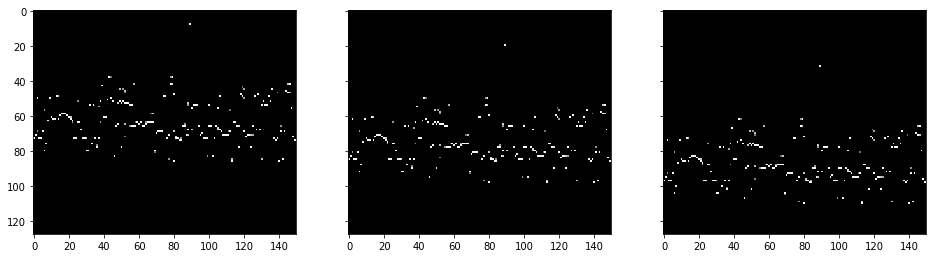

In [179]:
fig, axs= plt.subplots (1, cnt+1, sharex=True, sharey=True)
axs[0].imshow (Image.fromarray (img_arr))
k = 1
for i in range (img_arr_trnsp.shape[0]):
    if (img_arr_trnsp[i].sum () > 0):
        axs[k].imshow (Image.fromarray (img_arr_trnsp[i]))
        k += 1

fig.set_size_inches (16, 14)
plt.show ()

In [13]:
list_of_pitches_midi_oct_up = np.empty (1).astype (int)
max_pitch_midi_oct_up = img_arr_oct_up.shape[0]
for i in range (img_arr_oct_up.shape[1]):
    
    # check first if we have absolute silence in this time chunk = all values are zero
    if (img_arr_oct_up[:,i].sum () == 0):
        continue
    
    pitch_midi = max_pitch_midi_oct_up - img_arr_oct_up[:,i].argmax ()
    if pitch_midi not in list_of_pitches_midi_oct_up:
        list_of_pitches_midi_oct_up = np.append (list_of_pitches_midi_oct_up, pitch_midi)

list_of_pitches_midi_oct_up = list_of_pitches_midi_oct_up[1:]
print (list_of_pitches_midi_oct_up)



list_of_pitches_midi_oct_dwn = np.empty (1).astype (int)
max_pitch_midi_oct_dwn = img_arr_oct_dwn.shape[0]
for i in range (img_arr_oct_dwn.shape[1]):
    
    # check first if we have absolute silence in this time chunk = all values are zero
    if (img_arr_oct_dwn[:,i].sum () == 0):
        continue
    
    pitch_midi = max_pitch_midi_oct_dwn - img_arr_oct_dwn[:,i].argmax ()
    if pitch_midi not in list_of_pitches_midi_oct_dwn:
        list_of_pitches_midi_oct_dwn = np.append (list_of_pitches_midi_oct_dwn, pitch_midi)

list_of_pitches_midi_oct_dwn = list_of_pitches_midi_oct_dwn[1:]
print (list_of_pitches_midi_oct_dwn)

[ 67  69  90  71  60  64  77  79  78  91  80  81  76  72  86  62  88  97
  89 102  57  74  75  87  70  98  92  66  84  54  68  95  55  94  93]
[ 43  45  66  47  36  40  53  55  54  67  56  57  52  48  62  38  64  73
  65  78  33  50  51  63  46  74  68  42 108  60  30  44  71  31  70  69]


In [14]:
for arr_val in list_of_pitches_midi_oct_up:
    for dict_key, dict_value in dict_music_keys.items ():
        tone, octave = get_music_key (arr_val)
        if (tone == dict_value):
            print ('{}{}'.format (dict_key, octave), end=', ', flush=True)
print ()

for arr_val in list_of_pitches_midi_oct_dwn:
    for dict_key, dict_value in dict_music_keys.items ():
        tone, octave = get_music_key (arr_val)
        if (tone == dict_value):
            print ('{}{}'.format (dict_key, octave), end=', ', flush=True)
print ()

print ()
for arr_val in list_of_pitches_midi:
    for dict_key, dict_value in dict_music_keys.items ():
        tone, octave = get_music_key (arr_val)
        if (tone == dict_value):
            print ('{}{}'.format (dict_key, octave), end=', ', flush=True)
print ()

G4, A4, F#6, B4, C4, E4, F5, G5, F#5, G6, G#5, A5, E5, C5, D6, D4, E6, C#7, F6, F#7, A3, D5, D#5, D#6, A#4, D7, G#6, F#4, C6, F#3, G#4, B6, G3, A#6, A6, 
G2, A2, F#4, B2, C2, E2, F3, G3, F#3, G4, G#3, A3, E3, C3, D4, D2, E4, C#5, F4, F#5, A1, D3, D#3, D#4, A#2, D5, G#4, F#2, C8, C4, F#1, G#2, B4, G1, A#4, A4, 

G3, A3, F#5, B3, C3, E3, F4, G4, F#4, G5, G#4, A4, E4, C4, D5, D3, E5, C#6, F5, F#6, A2, D4, D#4, D#5, A#3, D6, G#5, F#3, C9, C5, F#2, G#3, B5, G2, A#5, A5, 
